In [35]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint 
from statsmodels.regression.rolling import RollingOLS

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

In [36]:
# data downloading and reading
"""
XLK ETF top 25 components (Technology): 
['NVDA', 'AAPL', 'MSFT', 'AVGO', 'PLTR', 'AMD', 'CSCO', 'ORCL', 'IBM', 'MU',
               'CRM', 'AMAT', 'LRCX', 'QCOM', 'INTU', 'APH', 'NOW', 'INTC', 'APP', 'ACN',
               'KLAC', 'TXN', 'ADBE', 'ANET', 'ADI']

XLRE ETF top 30 components (Real Estate):
['WELL', 'PLD', 'AMT', 'EQIX', 'SPG', 'CBRE', 'O', 'PSA', 'DLR', 'CCI',
               'VTR', 'VICI', 'CSGP', 'EXR', 'AVB', 'IRM', 'EQR', 'SBAC', 'ESS', 'WY',
               'MAA', 'INVH', 'KIM', 'DOC', 'REG', 'CPT', 'HST', 'UDR', 'BXP', 'ARE']

XLP ETF top 30 components (Consumer Staples):
['WMT', 'COST', 'PG', 'KO', 'PM', 'PEP', 'CL', 'MDLZ', 'MO', 'MNST',
               'TGT', 'KR', 'KDP', 'SYY', 'KMB', 'KVUE', 'ADM', 'HSY', 'GIS', 'DG',
               'EL', 'K', 'KHC', 'DLTR', 'CHD', 'STZ', 'MKC', 'TSN', 'BG', 'CLX']

XLI ETF top 30 components (Industrial):
['GE', 'CAT', 'RTX', 'UBER', 'GEV', 'BA', 'UNP', 'ETN', 'HON', 'DE',
               'PH', 'ADP', 'TT', 'MMM', 'LMT', 'GD', 'HWM', 'WM', 'TDG', 'JCI',
               'EMR', 'NOC', 'UPS', 'CMI', 'PWR', 'ITW', 'NSC', 'CSX', 'CTAS', 'FDX']

"""
# Symbols to download
symbol_list = ['GE', 'CAT', 'RTX', 'UBER', 'GEV', 'BA', 'UNP', 'ETN', 'HON', 'DE',
               'PH', 'ADP', 'TT', 'MMM', 'LMT', 'GD', 'HWM', 'WM', 'TDG', 'JCI',
               'EMR', 'NOC', 'UPS', 'CMI', 'PWR', 'ITW', 'NSC', 'CSX', 'CTAS', 'FDX']

# set the dates range
start_date = '2020-01-01'
end_date = dt.datetime.now().strftime('%Y-%m-%d')

# download data
# data = yf.download(symbol_list, period="max", group_by='ticker', auto_adjust=True)
data = yf.download(symbol_list, start=start_date, end=end_date, group_by='ticker', auto_adjust=True)

# download data to csv
data.to_csv(f"{'_'.join(symbol_list)}_D_data.csv")

# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv(f"{'_'.join(symbol_list)}_D_data.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

data = df.copy()

# Show the result
data.head()

[*********************100%***********************]  30 of 30 completed


Ticker             TDG                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2020-01-02  466.103892  471.622681  464.690942  471.622681  311700.0   
2020-01-03  466.552773  480.740307  466.552773  480.266602  278000.0   
2020-01-06  479.560120  486.574954  477.665145  486.051331  377700.0   
2020-01-07  484.862806  489.824745  482.685220  487.879852  255100.0   
2020-01-08  491.137899  491.137899  485.153672  486.741180  409100.0   

Ticker             HON                                                 ...  \
Price             Open        High         Low       Close     Volume  ...   
Date                                                                   ...   
2020-01-02  147.630614  150.375297  147.331201  150.366989  3031701.0  ...   
2020-01-03  148.329260  149.568518  147.555750  148.761749  2976317.0  ...   
2020-01-06  147.913391  148.362510  147.156524  147.638916  3477852.0  ...   
2020-01-07  147.522544  148.104740  146.042069  147.722153  3185971.0  ...   
2020-01-08  147.772040  148.961397  146.990222  147.846893  2700776.0  ...   

Ticker              PH                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2020-01-02  190.153184  192.688446  189.363213  192.688446  845200.0   
2020-01-03  188.885552  190.915584  186.644239  189.978653  895400.0   
2020-01-06  188.077195  190.125602  187.131069  190.061310  734100.0   
2020-01-07  190.052155  190.548191  188.306878  189.675552  699500.0   
2020-01-08  190.263393  190.639996  188.949830  189.804108  711500.0   

Ticker            CSX                                               
Price            Open       High        Low      Close      Volume  
Date                                                                
2020-01-02  22.396182  22.509979  22.220875  22.509979   8490300.0  
2020-01-03  22.143992  22.433095  22.030197  22.417717   9978900.0  
2020-01-06  22.199352  22.374659  22.064029  22.300846  14636400.0  
2020-01-07  22.359279  22.614550  22.193198  22.451544  14360700.0  
2020-01-08  22.596101  22.706822  22.473079  22.568420   8612700.0  

[5 rows x 150 columns]

In [37]:
# Print data length and date range before dropping NaNs
print(f"Initial data shape: {data.shape}")
print(f"Date range: {data.index.min()} to {data.index.max()}")

# Remove rows where all values are NaN
data = data.dropna(how='all')

# For pairs trading, we typically only need Close prices
# Extract Close prices for both tickers
close_prices = data.xs('Close', level=1, axis=1)

# Clean ticker names if needed (remove any suffixes, for forex scenario)
close_prices.columns = close_prices.columns.str.replace('=X', '', regex=False)

# Drop any remaining NaN values
close_prices = close_prices.dropna()

# Print data length and date range after dropping NaNs
print(f"Data shape after dropping all-NaN rows: {close_prices.shape}")
print(f"Date range: {close_prices.index.min()} to {close_prices.index.max()}")

print("Cleaned close prices data:")
print(close_prices.head())
print(f"\nData shape: {close_prices.shape}")
print(f"Date range: {close_prices.index.min()} to {close_prices.index.max()}")

# Use close_prices for the pairs trading analysis
data = close_prices

Initial data shape: (1487, 150)
Date range: 2020-01-02 to 2025-12-01
Data shape after dropping all-NaN rows: (422, 30)
Date range: 2024-03-27 to 2025-12-01
Cleaned close prices data:
Ticker              TDG         HON        HWM        RTX         FDX  \
Date                                                                    
2024-03-27  1093.408813  186.267914  67.749985  94.087067  278.383392   
2024-03-28  1091.458984  186.376862  68.098274  94.164299  280.182037   
2024-04-01  1075.808472  183.434799  65.789536  94.386360  270.889099   
2024-04-02  1066.840088  181.818451  64.943649  95.149086  266.208740   
2024-04-03  1088.720703  179.766266  65.680061  94.183617  269.303131   

Ticker             NOC          GE         CMI          GD        CTAS  ...  \
Date                                                                    ...   
2024-03-27  463.346680  142.161957  284.099701  272.191895  169.034943  ...   
2024-03-28  464.608521  138.539246  284.061096  272.761627  169.3776

In [38]:
# # manual filter to keep Date >= '2014-01-01'
# data = data[data.index >= '2014-01-01']

# # manual filter to exclude Date >= '2024-01-01'
# data = data[data.index < '2024-01-01']

In [39]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [40]:
# Time Series Split for Pairs Trading
# For financial time series, we use temporal split instead of random split
# This preserves the time order and avoids look-ahead bias
def temporal_split(data, train_ratio=0.7):
    """
    Split time series data temporally (chronologically)
    
    Parameters:
    data: DataFrame with time series data
    train_ratio: proportion of data to use for training (default 70%)
    
    Returns:
    train_data: DataFrame with training period data
    test_data: DataFrame with testing period data
    split_date: the date where split occurs
    """
    n_train = int(len(data) * train_ratio)
    train_data = data.iloc[:n_train]
    test_data = data.iloc[n_train:]
    split_date = data.index[n_train-1] if n_train > 0 else data.index[0]
    
    print(f"Total observations: {len(data)}")
    print(f"Training period: {data.index[0]} to {split_date} ({len(train_data)} observations)")
    print(f"Testing period: {data.index[n_train]} to {data.index[-1]} ({len(test_data)} observations)")
    print(f"Train ratio: {len(train_data)/len(data):.1%}")
    
    return train_data, test_data, split_date

# Split the data temporally
train_data, test_data, split_date = temporal_split(data, train_ratio=0.7)

Total observations: 422
Training period: 2024-03-27 to 2025-05-30 (295 observations)
Testing period: 2025-06-02 to 2025-12-01 (127 observations)
Train ratio: 69.9%


In [41]:
# Step 1: Find cointegrated pairs using TRAINING data only
# This prevents look-ahead bias in the strategy
scores_train, pvalues_train, pairs_train = find_cointegrated_pairs(train_data)

print("=== TRAINING PERIOD COINTEGRATION ANALYSIS ===")
print(f"Analysis period: {train_data.index[0]} to {train_data.index[-1]}")
print(f"Number of observations: {len(train_data)}")

=== TRAINING PERIOD COINTEGRATION ANALYSIS ===
Analysis period: 2024-03-27 to 2025-05-30
Number of observations: 295


In [42]:
# Step 2: Validate cointegration on TEST data
# Check if pairs found in training period maintain cointegration in test period
scores_test, pvalues_test, pairs_test = find_cointegrated_pairs(test_data)

print("\n=== TESTING PERIOD COINTEGRATION VALIDATION ===")
print(f"Analysis period: {test_data.index[0]} to {test_data.index[-1]}")
print(f"Number of observations: {len(test_data)}")


=== TESTING PERIOD COINTEGRATION VALIDATION ===
Analysis period: 2025-06-02 to 2025-12-01
Number of observations: 127


In [43]:
# Function to validate pairs consistency
def validate_pairs_consistency(pairs_train, pairs_test, pvalues_train, pvalues_test, data_train, data_test):
    """
    Validate if pairs found in training maintain cointegration in testing
    """
    print(f"\nPairs found in training: {len(pairs_train)}")
    print(f"Pairs found in testing: {len(pairs_test)}")

    # print names of pairs found in training
    print("\nPairs found in training period:")
    for pair in pairs_train:
        print(f"- {pair[0]} / {pair[1]}")   

    # print names of pairs found in testing
    print("\nPairs found in testing period:")
    for pair in pairs_test:
        print(f"- {pair[0]} / {pair[1]}")
    
    # Handle case when no training pairs exist
    if len(pairs_train) == 0:
        print("No pairs found in training period - cannot validate consistency")
        print("Consider:")
        print("- Relaxing cointegration threshold (e.g., p < 0.1)")
        print("- Using longer training period")
        print("- Checking data quality")
        
        # Show best pairs from training period anyway
        if len(pvalues_train) > 0:
            symbols = list(data_train.columns)
            n = len(symbols)
            
            best_train_pairs = []
            for i in range(n):
                for j in range(i+1, n):
                    best_train_pairs.append({
                        'pair': f"{symbols[i]}/{symbols[j]}",
                        'train_pvalue': pvalues_train[i, j],
                        'significant': pvalues_train[i, j] < 0.05
                    })
            
            best_train_df = pd.DataFrame(best_train_pairs)
            best_train_df = best_train_df.sort_values('train_pvalue')
            
            print(f"\nBest pairs from training (sorted by p-value):")
            print(best_train_df.head(5))
        
        return [], pd.DataFrame()
    
    # Check which training pairs are also significant in testing
    consistent_pairs = []
    validation_results = []
    
    for pair in pairs_train:
        symbol1, symbol2 = pair
        
        # Find indices for this pair in training data
        train_cols = list(data_train.columns)
        i_train = train_cols.index(symbol1)
        j_train = train_cols.index(symbol2)
        
        # Ensure upper triangular access (i < j)
        if i_train > j_train:
            i_train, j_train = j_train, i_train
        
        train_pvalue = pvalues_train[i_train, j_train]
        
        # Find indices for this pair in testing data  
        test_cols = list(data_test.columns)
        i_test = test_cols.index(symbol1)
        j_test = test_cols.index(symbol2)
        
        # Ensure upper triangular access (i < j)
        if i_test > j_test:
            i_test, j_test = j_test, i_test
        
        test_pvalue = pvalues_test[i_test, j_test]
        
        # Check if still cointegrated in test period
        is_consistent = test_pvalue < 0.05
        
        validation_results.append({
            'pair': f"{symbol1}/{symbol2}",
            'train_pvalue': train_pvalue,
            'test_pvalue': test_pvalue,
            'consistent': is_consistent,
            'pvalue_change': test_pvalue - train_pvalue
        })
        
        if is_consistent:
            consistent_pairs.append(pair)
    
    # Create validation DataFrame
    validation_df = pd.DataFrame(validation_results)
    if len(validation_df) > 0:
        validation_df = validation_df.sort_values('test_pvalue')
    
    print(f"Consistent pairs (significant in both periods): {len(consistent_pairs)}")
    if len(pairs_train) > 0:
        print(f"Consistency rate: {len(consistent_pairs)/len(pairs_train):.1%}")
    
    return consistent_pairs, validation_df

# Validate pairs consistency
consistent_pairs, validation_df = validate_pairs_consistency(
    pairs_train, pairs_test, pvalues_train, pvalues_test, train_data, test_data
)

if len(validation_df) > 0:
    print(f"\n=== PAIRS VALIDATION RESULTS ===")
    print(validation_df)
else:
    print(f"\n=== NO VALIDATION POSSIBLE ===")
    print("No cointegrated pairs found in training period")

if len(consistent_pairs) > 0:
    print("\nConsistent pairs across training and testing periods:")
    for pair in consistent_pairs:
        print(f"- {pair[0]} / {pair[1]}")


Pairs found in training: 17
Pairs found in testing: 18

Pairs found in training period:
- TDG / HWM
- TDG / RTX
- TDG / GE
- TDG / DE
- TDG / GEV
- TDG / UPS
- TDG / ADP
- TDG / JCI
- HON / PWR
- HON / TT
- CMI / ITW
- GD / DE
- WM / UPS
- CAT / NSC
- NSC / ITW
- NSC / PH
- ITW / PH

Pairs found in testing period:
- HWM / FDX
- RTX / GE
- RTX / WM
- RTX / CAT
- FDX / MMM
- FDX / ADP
- FDX / JCI
- GE / GD
- MMM / CAT
- MMM / ADP
- MMM / JCI
- MMM / PH
- GEV / UPS
- WM / CAT
- WM / JCI
- PWR / CAT
- TT / EMR
- ADP / JCI
Consistent pairs (significant in both periods): 0
Consistency rate: 0.0%

=== PAIRS VALIDATION RESULTS ===
       pair  train_pvalue  test_pvalue  consistent  pvalue_change
11    GD/DE      0.030562     0.102515       False       0.071953
3    TDG/DE      0.035300     0.173737       False       0.138437
5   TDG/UPS      0.038942     0.299545       False       0.260603
2    TDG/GE      0.019870     0.329579       False       0.309709
9    HON/TT      0.036943     0.422383

In [52]:
# # To fix later

# # Visualize cointegration results - Training vs Testing period
# fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# # Training period heatmap
# sns.heatmap(
#     pvalues_train, 
#     xticklabels=symbol_list, 
#     yticklabels=symbol_list, 
#     cmap='RdYlGn_r',  # Red = high p-value (bad), Green = low p-value (good)
#     vmin=0, 
#     vmax=0.1,  # Focus on the significant range
#     ax=axes[0],
#     annot=True,
#     fmt='.3f',
#     cbar_kws={'label': 'P-Value'}
# )
# axes[0].set_title('Training Period - Cointegration P-Values\n(Lower = Better, p < 0.05 is significant)', fontsize=14)

# # Testing period heatmap
# sns.heatmap(
#     pvalues_test, 
#     xticklabels=symbol_list, 
#     yticklabels=symbol_list, 
#     cmap='RdYlGn_r',
#     vmin=0, 
#     vmax=0.1,
#     ax=axes[1],
#     annot=True,
#     fmt='.3f',
#     cbar_kws={'label': 'P-Value'}
# )
# axes[1].set_title('Testing Period - Cointegration P-Values\n(Lower = Better, p < 0.05 is significant)', fontsize=14)

# plt.tight_layout()
# plt.show()

In [45]:
# Enhanced Backtesting Framework
# Use parameters estimated from training period and test on out-of-sample data
def estimate_hedge_ratio_and_spread(data, symbol1, symbol2):
    """
    Estimate hedge ratio and calculate spread for a pair
    Returns regression results and spread series
    """
    S1 = data[symbol1]
    S2 = data[symbol2]
    
    # Add constant for regression
    S1_const = sm.add_constant(S1)
    results = sm.OLS(S2, S1_const).fit()
    
    # Get regression coefficient (hedge ratio)
    hedge_ratio = results.params[symbol1]
    intercept = results.params['const']
    
    # Calculate spread
    spread = S2 - hedge_ratio * S1
    
    return {
        'hedge_ratio': hedge_ratio,
        'intercept': intercept,
        'results': results,
        'spread': spread,
        'spread_mean': spread.mean(),
        'spread_std': spread.std()
    }

def backtest_pair_strategy(train_data, test_data, symbol1, symbol2, z_threshold=1.0):
    """
    Backtest a pairs trading strategy:
    1. Estimate parameters on training data
    2. Apply strategy on test data with those parameters
    """
    print(f"\n=== BACKTESTING {symbol1}/{symbol2} ===")
    
    # Step 1: Estimate parameters on training data
    train_params = estimate_hedge_ratio_and_spread(train_data, symbol1, symbol2)
    
    print(f"Training Period Parameters:")
    print(f"  Hedge Ratio: {train_params['hedge_ratio']:.4f}")
    print(f"  R-squared: {train_params['results'].rsquared:.4f}")
    print(f"  Spread Mean: {train_params['spread_mean']:.4f}")
    print(f"  Spread Std: {train_params['spread_std']:.4f}")
    
    # Step 2: Apply strategy on test data using training parameters
    S1_test = test_data[symbol1]
    S2_test = test_data[symbol2]
    
    # Calculate spread using training hedge ratio
    spread_test = S2_test - train_params['hedge_ratio'] * S1_test
    
    # Calculate z-score using training mean and std
    zscore_test = (spread_test - train_params['spread_mean']) / train_params['spread_std']
    
    # Generate trading signals
    signals = pd.DataFrame(index=test_data.index)
    signals['spread'] = spread_test
    signals['zscore'] = zscore_test
    signals['position'] = 0.0
    
    # Long spread when z-score <= -threshold
    signals.loc[signals.zscore <= -z_threshold, 'position'] = 1.0
    # Short spread when z-score >= threshold  
    signals.loc[signals.zscore >= z_threshold, 'position'] = -1.0
    
    # Calculate returns
    signals['spread_returns'] = signals.spread.pct_change()
    signals['strategy_returns'] = signals.spread_returns * signals.position.shift(1)
    signals = signals.dropna()
    
    # Performance metrics
    total_return = signals.strategy_returns.cumsum().iloc[-1]
    sharpe_ratio = signals.strategy_returns.mean() / signals.strategy_returns.std() * np.sqrt(252) if signals.strategy_returns.std() != 0 else 0
    win_rate = (signals[signals.strategy_returns > 0].shape[0] / 
               signals[signals.strategy_returns != 0].shape[0]) if signals[signals.strategy_returns != 0].shape[0] > 0 else 0
    
    print(f"\nOut-of-Sample Test Results:")
    print(f"  Total Return: {total_return:.4f} ({total_return*100:.2f}%)")
    print(f"  Annualized Sharpe: {sharpe_ratio:.4f}")
    print(f"  Win Rate: {win_rate:.2%}")
    print(f"  Number of Trades: {(signals.position != 0).sum()}")
    
    return {
        'signals': signals,
        'train_params': train_params,
        'total_return': total_return,
        'sharpe_ratio': sharpe_ratio,
        'win_rate': win_rate
    }

# Run backtest on the available pair
if len(consistent_pairs) > 0:
    best_pair = consistent_pairs[0]
    symbol1, symbol2 = best_pair
    
    backtest_results = backtest_pair_strategy(
        train_data, test_data, symbol1, symbol2, z_threshold=1.0
    )
elif len(pairs_train) > 0:
    best_pair = pairs_train[0]
    symbol1, symbol2 = best_pair
    
    backtest_results = backtest_pair_strategy(
        train_data, test_data, symbol1, symbol2, z_threshold=1.0
    )
    
    print(f"\n WARNING: This pair was not consistently cointegrated across periods")
    print("This is a demonstration of the methodology, not a robust trading signal")
else:
    print("No pairs available for backtesting")
    print("Consider adjusting the cointegration threshold or using different data")


=== BACKTESTING TDG/HWM ===
Training Period Parameters:
  Hedge Ratio: 0.2875
  R-squared: 0.6921
  Spread Mean: -240.2629
  Spread Std: 14.1919

Out-of-Sample Test Results:
  Total Return: -0.0297 (-2.97%)
  Annualized Sharpe: -0.1658
  Win Rate: 49.02%
  Number of Trades: 102

This is a demonstration of the methodology, not a robust trading signal


In [46]:
# Visualize backtest results
if len(consistent_pairs) > 0 and 'backtest_results' in locals():
    
    signals = backtest_results['signals']
    train_params = backtest_results['train_params']
    
    # Ensure index is datetime for proper date formatting
    if not isinstance(signals.index, pd.DatetimeIndex):
        signals.index = pd.to_datetime(signals.index)
    
    train_spread = train_params['spread'].copy()
    if not isinstance(train_spread.index, pd.DatetimeIndex):
        train_spread.index = pd.to_datetime(train_spread.index)
    
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))
    
    # Plot 1: Cumulative returns comparison
    cumulative_returns = signals.strategy_returns.cumsum()
    axes[0].plot(signals.index, cumulative_returns, linewidth=2, color='blue', label='Strategy Returns')
    axes[0].set_title(f'Out-of-Sample Backtest: {best_pair[0]}/{best_pair[1]} Strategy Returns')
    axes[0].axhline(0, color='black', linestyle='-', alpha=0.5)
    axes[0].axvline(pd.to_datetime(split_date), color='red', linestyle='--', alpha=0.7, label='Train/Test Split')
    axes[0].set_ylabel('Cumulative Returns')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Z-score and signals
    axes[1].plot(signals.index, signals.zscore, linewidth=1, color='blue', label='Z-Score')
    axes[1].axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Short Signal')
    axes[1].axhline(-1.0, color='green', linestyle='--', alpha=0.7, label='Long Signal')
    axes[1].axhline(0, color='black', linestyle='-', alpha=0.5)
    axes[1].axvline(pd.to_datetime(split_date), color='red', linestyle='--', alpha=0.7)
    
    # Mark trades
    long_trades = signals[signals.position == 1]
    short_trades = signals[signals.position == -1]
    axes[1].scatter(long_trades.index, long_trades.zscore, color='green', marker='^', s=20, alpha=0.7, label='Long')
    axes[1].scatter(short_trades.index, short_trades.zscore, color='red', marker='v', s=20, alpha=0.7, label='Short')
    
    axes[1].set_title('Trading Signals (Out-of-Sample)')
    axes[1].set_ylabel('Z-Score')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Spread evolution
    axes[2].plot(train_spread.index, train_spread, 
                linewidth=1, color='gray', alpha=0.7, label='Training Spread')
    axes[2].plot(signals.index, signals.spread, linewidth=1, color='blue', label='Test Spread')
    axes[2].axhline(train_params['spread_mean'], color='black', linestyle='-', alpha=0.7, label='Training Mean')
    axes[2].axhline(train_params['spread_mean'] + train_params['spread_std'], color='red', linestyle='--', alpha=0.5)
    axes[2].axhline(train_params['spread_mean'] - train_params['spread_std'], color='green', linestyle='--', alpha=0.5)
    axes[2].axvline(pd.to_datetime(split_date), color='red', linestyle='--', alpha=0.7)
    
    axes[2].set_title('Spread Evolution')
    axes[2].set_ylabel('Spread')
    axes[2].set_xlabel('Date')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    # Fix overlapping dates
    fig.autofmt_xdate(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics table
    summary_stats = pd.DataFrame({
        'Metric': ['Total Return', 'Annualized Sharpe', 'Win Rate', 'Number of Trades', 
                  'Training R²', 'Max Drawdown'],
        'Value': [f"{backtest_results['total_return']:.2%}", 
                 f"{backtest_results['sharpe_ratio']:.3f}",
                 f"{backtest_results['win_rate']:.1%}",
                 f"{(signals.position != 0).sum()}",
                 f"{train_params['results'].rsquared:.3f}",
                 f"{(cumulative_returns - cumulative_returns.expanding().max()).min():.2%}"]
    })
    
    print("\n=== BACKTEST PERFORMANCE SUMMARY ===")
    print(summary_stats.to_string(index=False))

In [47]:
# Pairs Trading Analysis
# Selected Pair Analysis
# Setup regression and calculate spread

# Use the best pair from cointegration analysis
if len(consistent_pairs) > 0:
    best_pair = consistent_pairs[0]  # Use first consistent pair
elif len(pairs_train) > 0:
    best_pair = pairs_train[0]  # Fallback to best training pair
    print("WARNING: No consistent pairs found. Using best training pair for demonstration.")
else:
    raise ValueError("No cointegrated pairs found. Cannot proceed with analysis.")

symbol1, symbol2 = best_pair
print(f"Analyzing pair: {symbol1}/{symbol2}")

S1 = data[symbol1]  # Independent variable
S2 = data[symbol2]  # Dependent variable

# Add constant for regression
S1_const = sm.add_constant(S1)
results_pair1 = sm.OLS(S2, S1_const).fit()

# Get regression coefficient (hedge ratio)
b_pair1 = results_pair1.params[symbol1]
intercept_pair1 = results_pair1.params['const']

# Calculate spread
spread_pair1 = S2 - b_pair1 * S1

print(f"\n{symbol1}/{symbol2} Regression Results:")
print(f"Hedge Ratio (beta): {b_pair1:.4f}")
print(f"Intercept: {intercept_pair1:.4f}")
print(f"R-squared: {results_pair1.rsquared:.4f}")
print(f"Spread mean: {spread_pair1.mean():.4f}")
print(f"Spread std: {spread_pair1.std():.4f}")
print("\nRegression Summary:")
print(results_pair1.summary())

Analyzing pair: TDG/HWM

TDG/HWM Regression Results:
Hedge Ratio (beta): 0.3658
Intercept: -325.9182
R-squared: 0.6812
Spread mean: -325.9182
Spread std: 24.3341

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                    HWM   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     897.4
Date:                Tue, 02 Dec 2025   Prob (F-statistic):          2.60e-106
Time:                        19:35:43   Log-Likelihood:                -1945.3
No. Observations:                 422   AIC:                             3895.
Df Residuals:                     420   BIC:                             3903.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    st

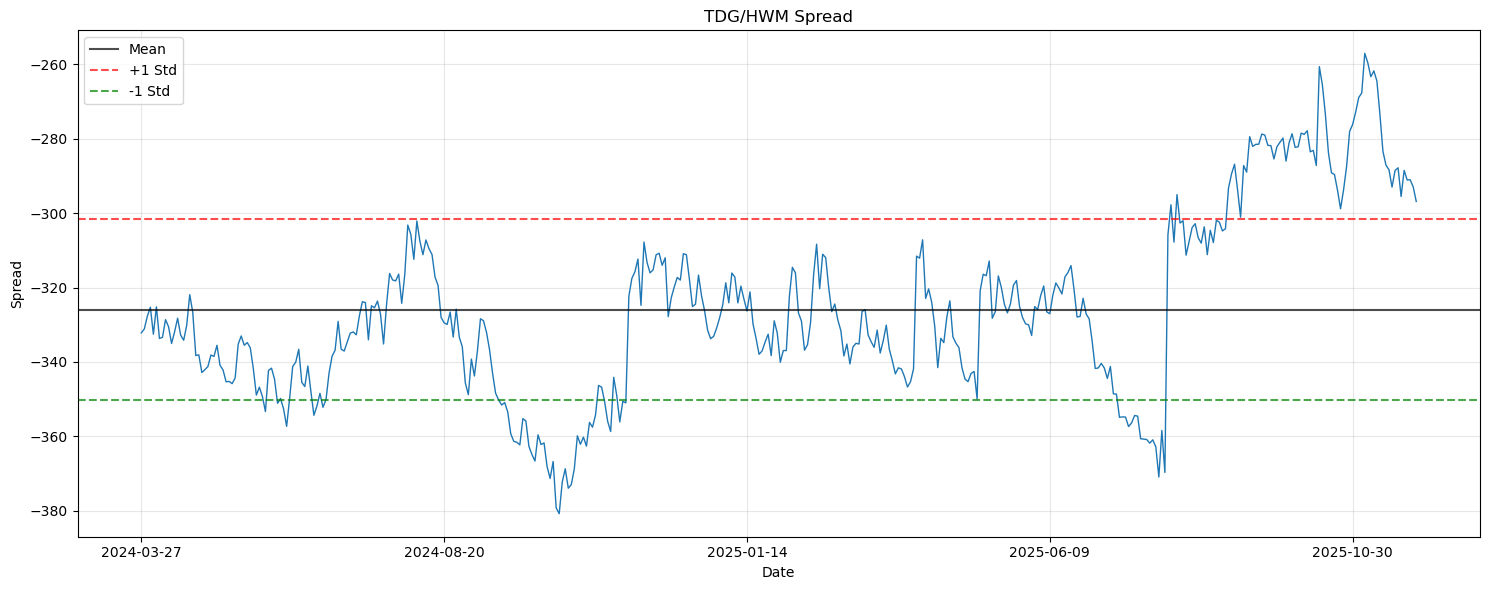

In [48]:
# Plot spread for selected pair
plt.figure(figsize=(15, 6))
spread_pair1.plot(title=f'{symbol1}/{symbol2} Spread', linewidth=1)
plt.axhline(spread_pair1.mean(), color='black', linestyle='-', alpha=0.7, label='Mean')
plt.axhline(spread_pair1.mean() + spread_pair1.std(), color='red', linestyle='--', alpha=0.7, label='+1 Std')
plt.axhline(spread_pair1.mean() - spread_pair1.std(), color='green', linestyle='--', alpha=0.7, label='-1 Std')
plt.ylabel('Spread')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

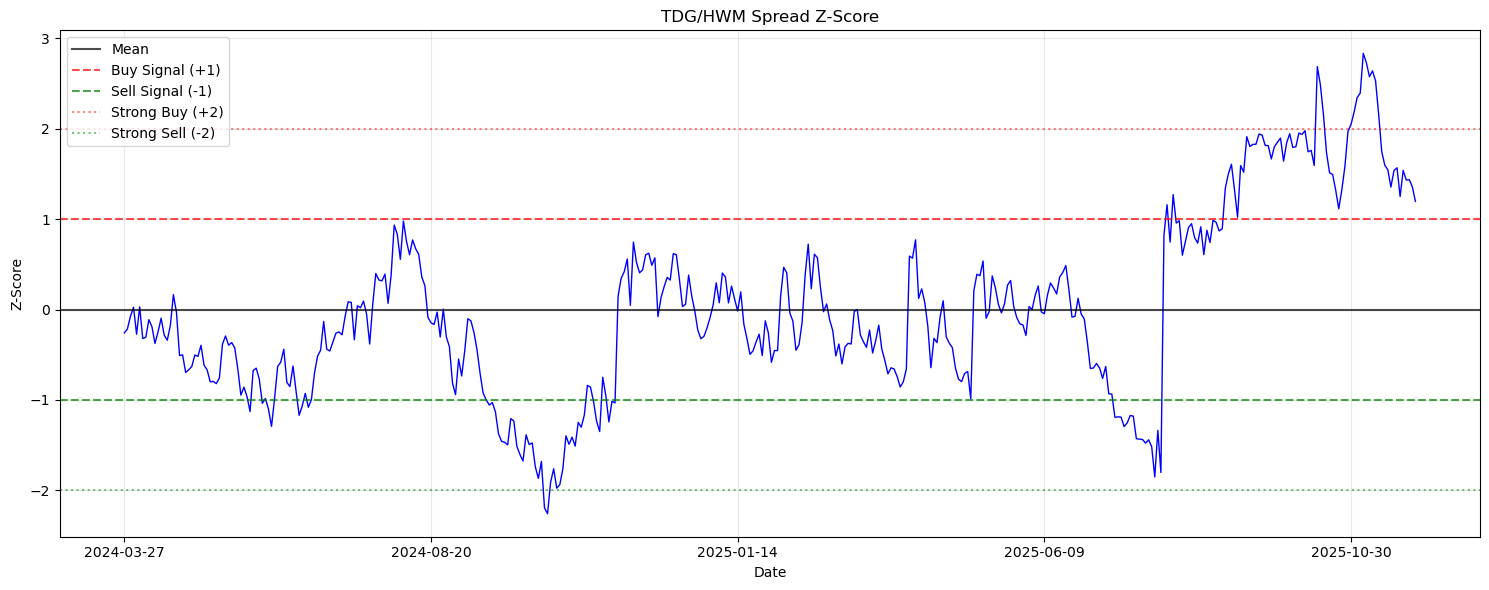

Z-score statistics for TDG/HWM:
Mean: 0.0000
Std: 1.0012
Min: -2.2590
Max: 2.8354


In [49]:
# Z-score calculation and visualization for selected pair
def zscore(series):
    return (series - series.mean()) / np.std(series)

# Calculate z-score of spread
zscore_pair1 = zscore(spread_pair1)

# Plot z-score
plt.figure(figsize=(15, 6))
zscore_pair1.plot(title=f'{symbol1}/{symbol2} Spread Z-Score', linewidth=1, color='blue')
plt.axhline(zscore_pair1.mean(), color='black', linestyle='-', alpha=0.7, label='Mean')
plt.axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Buy Signal (+1)')
plt.axhline(-1.0, color='green', linestyle='--', alpha=0.7, label='Sell Signal (-1)')
plt.axhline(2.0, color='red', linestyle=':', alpha=0.5, label='Strong Buy (+2)')
plt.axhline(-2.0, color='green', linestyle=':', alpha=0.5, label='Strong Sell (-2)')
plt.ylabel('Z-Score')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Z-score statistics for {symbol1}/{symbol2}:")
print(f"Mean: {zscore_pair1.mean():.4f}")
print(f"Std: {zscore_pair1.std():.4f}")
print(f"Min: {zscore_pair1.min():.4f}")
print(f"Max: {zscore_pair1.max():.4f}")

In [50]:
# Trading Strategy for selected pair
# Create DataFrame with signal and position
trades_pair1 = pd.DataFrame({
    'signal': zscore_pair1,
    'position': spread_pair1,
    symbol1: S1,
    symbol2: S2
})

# Add trading side based on z-score thresholds
trades_pair1['side'] = 0.0
trades_pair1.loc[trades_pair1.signal <= -1, 'side'] = 1.0   # Long spread when z-score <= -1
trades_pair1.loc[trades_pair1.signal >= 1, 'side'] = -1.0   # Short spread when z-score >= 1

# Calculate position changes and returns
trades_pair1['position_change'] = trades_pair1.position.pct_change()
trades_pair1['strategy_returns'] = trades_pair1.position_change * trades_pair1.side.shift(1)

# Remove NaN values
trades_pair1 = trades_pair1.dropna()

print(f"{symbol1}/{symbol2} Trading Signals Summary:")
print(f"Total trading signals: {(trades_pair1.side != 0).sum()}")
print(f"Long signals: {(trades_pair1.side == 1).sum()}")
print(f"Short signals: {(trades_pair1.side == -1).sum()}")
print(f"Signal ratio: {(trades_pair1.side != 0).mean():.2%}")

# Display first few trades
print("\nFirst 10 trading signals:")
signal_trades = trades_pair1[trades_pair1.side != 0].head(10)
print(signal_trades[['signal', 'side', 'strategy_returns']])

TDG/HWM Trading Signals Summary:
Total trading signals: 127
Long signals: 62
Short signals: 65
Signal ratio: 30.17%

First 10 trading signals:
              signal  side  strategy_returns
Date                                        
2024-05-24 -1.128860   1.0          0.000000
2024-05-31 -1.037302   1.0          0.000000
2024-06-04 -1.101978   1.0          0.000000
2024-06-05 -1.292457   1.0          0.013126
2024-06-18 -1.169599   1.0          0.000000
2024-06-20 -1.067033   1.0         -0.007035
2024-06-24 -1.081480   1.0          0.000000
2024-09-16 -1.000119   1.0          0.000000
2024-09-17 -1.056414   1.0          0.003907
2024-09-18 -1.029383   1.0         -0.001869


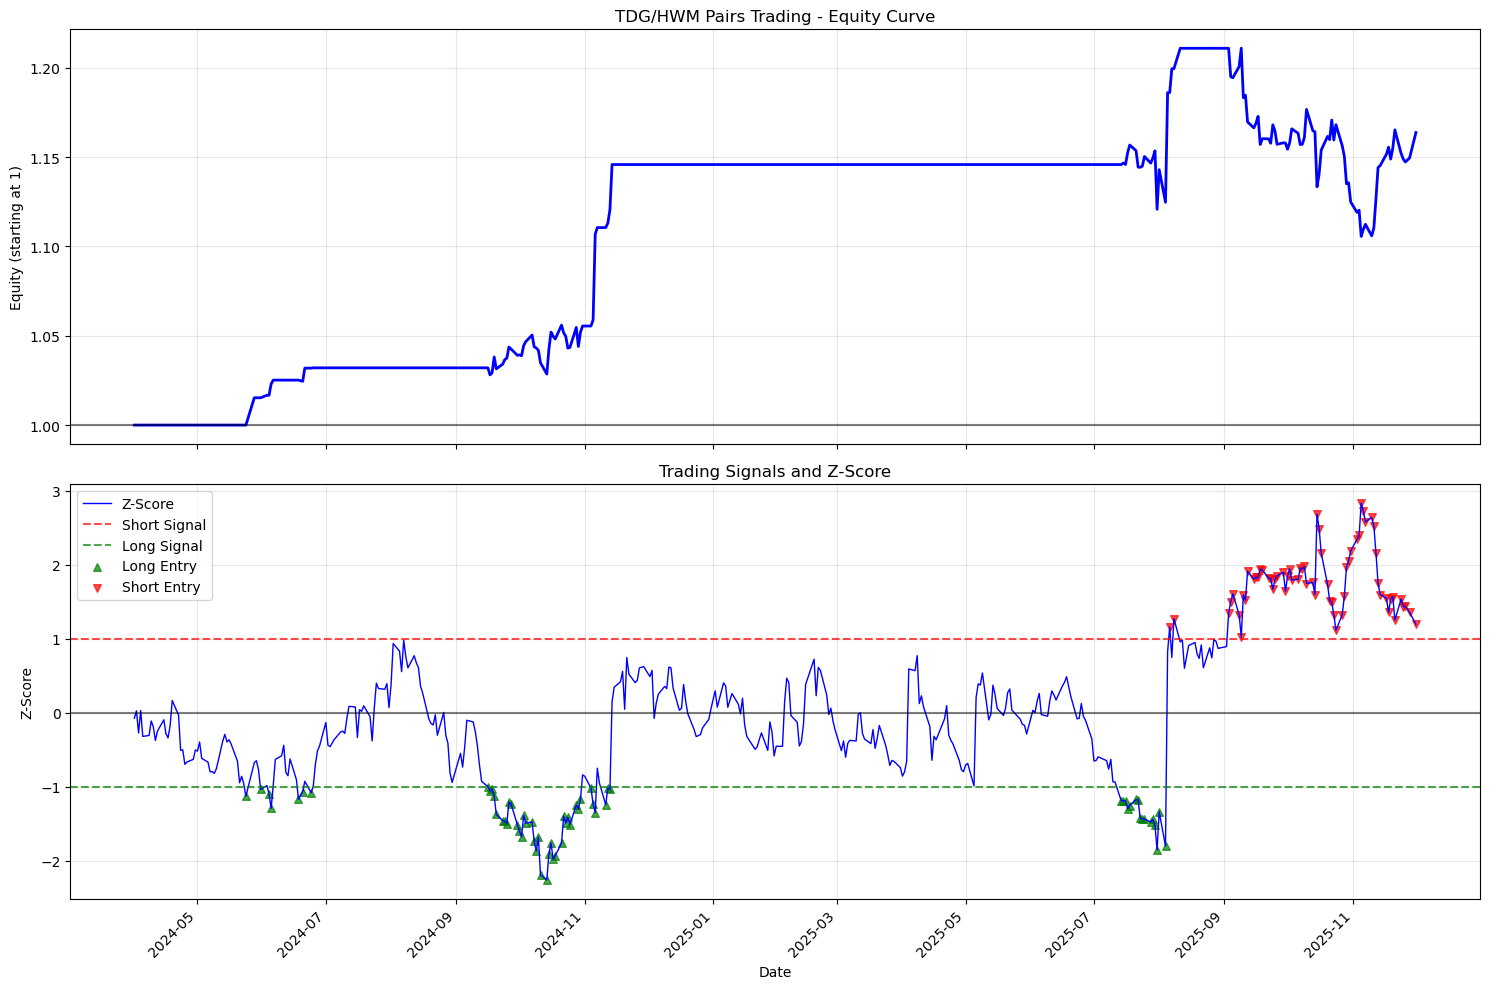


TDG/HWM Strategy Performance:
Total Return: 0.1638 (16.38%)
Annualized Sharpe Ratio: 1.0644
Maximum Drawdown: -0.0870 (-8.70%)


In [51]:
# Plot strategy performance for selected pair
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Calculate returns properly for pairs trading
# For a pairs trade: Long symbol2, Short symbol1 (when spread is expected to rise)
# Returns = weight2 * return2 - weight1 * return1
# Using equal dollar weights for simplicity

# Calculate individual stock returns
returns_S1 = S1.pct_change()
returns_S2 = S2.pct_change()

# Align with trades_pair1 index
returns_S1 = returns_S1.reindex(trades_pair1.index)
returns_S2 = returns_S2.reindex(trades_pair1.index)

# Strategy returns: when side=1 (long spread), we're long S2, short S1
# when side=-1 (short spread), we're short S2, long S1
# Use equal weights (0.5 each side)
trades_pair1['strategy_returns'] = trades_pair1.side.shift(1) * 0.5 * (returns_S2 - returns_S1)
trades_pair1 = trades_pair1.dropna()

# Ensure index is datetime for proper date formatting
if not isinstance(trades_pair1.index, pd.DatetimeIndex):
    trades_pair1.index = pd.to_datetime(trades_pair1.index)

# Plot cumulative returns using equity curve
equity_curve = (1 + trades_pair1.strategy_returns).cumprod()
axes[0].plot(trades_pair1.index, equity_curve, linewidth=2, color='blue')
axes[0].set_title(f'{symbol1}/{symbol2} Pairs Trading - Equity Curve')
axes[0].axhline(1, color='black', linestyle='-', alpha=0.5)
axes[0].set_ylabel('Equity (starting at 1)')
axes[0].grid(True, alpha=0.3)

# Plot signals with z-score
axes[1].plot(trades_pair1.index, trades_pair1.signal, linewidth=1, color='blue', label='Z-Score')
axes[1].axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Short Signal')
axes[1].axhline(-1.0, color='green', linestyle='--', alpha=0.7, label='Long Signal')
axes[1].axhline(0, color='black', linestyle='-', alpha=0.5)

# Mark actual trades
long_trades = trades_pair1[trades_pair1.side == 1]
short_trades = trades_pair1[trades_pair1.side == -1]
axes[1].scatter(long_trades.index, long_trades.signal, color='green', marker='^', s=30, alpha=0.7, label='Long Entry')
axes[1].scatter(short_trades.index, short_trades.signal, color='red', marker='v', s=30, alpha=0.7, label='Short Entry')

axes[1].set_title('Trading Signals and Z-Score')
axes[1].set_ylabel('Z-Score')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Fix overlapping dates
fig.autofmt_xdate(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Performance metrics (CORRECTED)
# Total return (compounded)
total_return = equity_curve.iloc[-1] - 1

# Sharpe ratio
sharpe_ratio = trades_pair1.strategy_returns.mean() / trades_pair1.strategy_returns.std() * np.sqrt(252)

# Max drawdown (from equity curve)
rolling_max = equity_curve.expanding().max()
drawdown = (equity_curve - rolling_max) / rolling_max
max_drawdown = drawdown.min()

print(f"\n{symbol1}/{symbol2} Strategy Performance:")
print(f"Total Return: {total_return:.4f} ({total_return*100:.2f}%)")
print(f"Annualized Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f} ({max_drawdown*100:.2f}%)")